In [1]:
from data_processor import DataProcessor
import numpy as np
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
def evaluate(model, x_valid, y_valid):
    error = mean_squared_error(y_valid.ravel(), model.predict(x_valid))
    var = np.var(y_valid.ravel())
    #print("The MSE error is: ", error)
    #print("The variance of the validation set is: ", var)
    r_2 = 1 - error / var

    #print("The model explians" ,r_2 ," of the variance in data")
    return r_2
    

In [3]:
file_1 = "../data/Train.csv"
file_2 = "../data/additional_data/trainRoot_edited.csv"

processor = DataProcessor(file_1, file_2, test = False, minimal = True)
x_train, x_valid, y_train, y_valid = processor.get_numpy_data(fillna = True, additional = True,
                                                                            encode = True, np_split = True, enocde_user = False,
                                                                            normalize = True, drop_ones = True)

In [4]:
results = []

In [7]:
i =0 
for depth in range (1, 10, 2): 
    for estimators in range(100, 1500, 300):
        for weight in range(1, 50, 3):
            i += 1
            param_dist = {'objective':'reg:squarederror', 'n_estimators':estimators, 'max_depth':depth, 'min_child_weight': weight}
            bst = xgb.XGBRFRegressor(**param_dist)
            #print("=*="*20)
            bst.fit(x_train, y_train.ravel(), eval_set=[(x_valid, y_valid)], verbose = True)
            #print("depth = ",depth, "estimators = ", estimators )
            #results = bst.evals_result()
            r_2 = evaluate(bst, x_valid, y_valid)
            results.append((r_2, depth, estimators, weight))
            
            if i % 5 ==0:
                with open ("results.txt", "w") as f:
                    for element in results[i-5:i]:
                        f.write(str(element)+'\n')
print(results)

[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:851.494
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	validation_0-rmse:847.864
[0]	valida

[0]	validation_0-rmse:800.347
[0]	validation_0-rmse:798.404
[0]	validation_0-rmse:796.58
[0]	validation_0-rmse:795.223
[0]	validation_0-rmse:794.241
[0]	validation_0-rmse:794.11
[0]	validation_0-rmse:793.786
[0]	validation_0-rmse:793.331
[0]	validation_0-rmse:793.229
[0]	validation_0-rmse:793.04
[0]	validation_0-rmse:792.666
[0]	validation_0-rmse:792.107
[0]	validation_0-rmse:791.619
[0]	validation_0-rmse:791.558
[0]	validation_0-rmse:791.181
[0]	validation_0-rmse:816.65
[0]	validation_0-rmse:803.896
[0]	validation_0-rmse:800.431
[0]	validation_0-rmse:798.959
[0]	validation_0-rmse:797.503
[0]	validation_0-rmse:796.011
[0]	validation_0-rmse:795.119
[0]	validation_0-rmse:794.991
[0]	validation_0-rmse:794.724
[0]	validation_0-rmse:794.212
[0]	validation_0-rmse:794.067
[0]	validation_0-rmse:793.858
[0]	validation_0-rmse:793.257
[0]	validation_0-rmse:792.75
[0]	validation_0-rmse:792.16
[0]	validation_0-rmse:792.109
[0]	validation_0-rmse:791.633
[0]	validation_0-rmse:816.336
[0]	validation_0

In [8]:
evaluate(bst, x_valid, y_valid)

0.3163804296359469

In [9]:
#for result in results:
    #print(result)

In [10]:
rs = []
ests = []
depths = []
ws = []
for result in results:
    rs.append(result[0])
    depths.append(result[1])
    ests.append(result[2])
    ws.append(result[3])

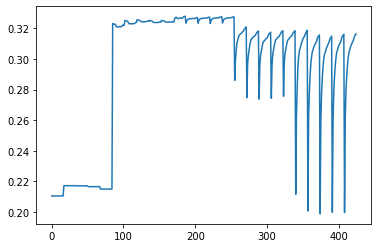

In [11]:
#plt.plot(ests, rs)
#plt.plot(depths, rs)
#plt.plot(ws, rs)
plt.plot(rs)
plt.show()

In [12]:
print(rs)

[0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21044151870839511, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21715929167480452, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.21703097603959076, 0.2170309760